In [1]:
"""Notebook showing Correlation heatmap for selected features"""

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
import warnings
import seaborn as sns
from matplotlib import cm as cm
from textblob import TextBlob

warnings.simplefilter(action = "ignore", category = FutureWarning)

In [2]:
# Read data
data = pd.read_csv('processed_datascience.csv.bz2')

In [3]:
# Generate and package data into dataframe
blobs = [TextBlob(sentence) for sentence in data.title]
data['polarity'] = [blob.sentiment.polarity for blob in blobs]
data['subjectivity'] = [blob.sentiment.subjectivity for blob in blobs]
data['noun_phrases'] = [len(blob.noun_phrases) for blob in blobs]

data['gt20'] = data['ups'] > 20
data['wordcount'] = data['title'].str.split().apply(len)
data['charcount'] = data.title.str.len()
data['vowels'] = data.title.str.findall(r'[aeiou]').apply(len)
data['consonants'] = data.title.str.findall(r'[^aeiou]').apply(len)

df = data[['ups','wordcount','charcount','vowels','consonants', 'polarity', 'subjectivity', 'noun_phrases']]

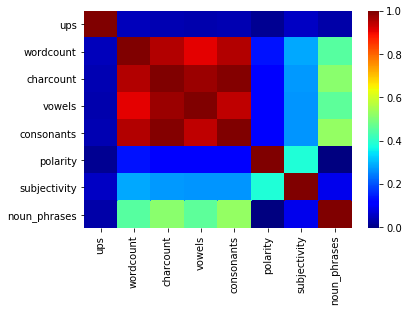

In [4]:
# plot corellation heatmap
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,cmap='jet')

In [5]:
# Show numerical values for correlation
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,ups,wordcount,charcount,vowels,consonants,polarity,subjectivity,noun_phrases
ups,1,0.048,0.04,0.038,0.041,0.013,0.056,0.034
wordcount,0.048,1,0.95,0.91,0.96,0.14,0.29,0.45
charcount,0.04,0.95,1,0.97,0.99,0.12,0.27,0.51
vowels,0.038,0.91,0.97,1,0.94,0.12,0.27,0.46
consonants,0.041,0.96,0.99,0.94,1,0.12,0.27,0.53
polarity,0.013,0.14,0.12,0.12,0.12,1,0.38,-0.0038
subjectivity,0.056,0.29,0.27,0.27,0.27,0.38,1,0.093
noun_phrases,0.034,0.45,0.51,0.46,0.53,-0.0038,0.093,1
